# 2.3 Histogram Processing and Function Plotting
## 2.3.1 Generating and Plotting Image Histograms
#### The core function in the toolbox for dealing with image histogram is `imhist`, with the basic syntax:

In [ ]:
h = imhist(f, b)

#### where $f$ is the input image, $h$ is its histogram, and $b$ is the number of bins used in forming the histogram, if $b$ is not included in the argument, $b=256$ is used by default.

### Example 2.4: Computing and plotting image histograms.

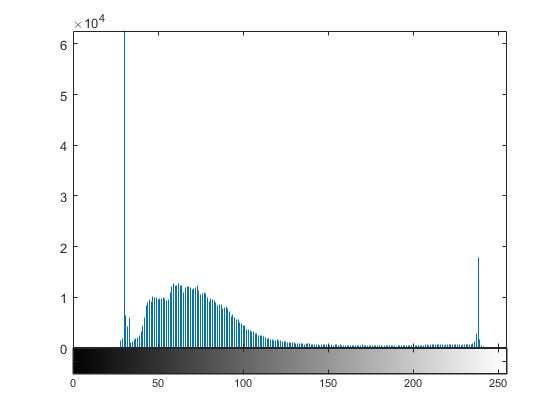

In [2]:
f = imread('Fig0203(a).tif');
imhist(f)

#### Histograms can be plotted also using *bar* graphs. For this purpose we can use the function

In [ ]:
bar(horz, z, width)

#### where $z$ is a row vector containing the points to be plotted,`horz` is a vector of the same dimension as $z$ that contains the increments of the horizontal scale, and `width` is a number between 0 and 1.

#### In other words, the values of `horz` give the horizontal increments and the values of $z$ are the corresponding vertical values. If `horz` is omitted, the horizontal axis is divided in units from 0 to `length(z)`. When `width` is 1, the bars touch; when it is 0, the bars are vertical reduce the resolution of the horizontal axis by dividing it into bands.

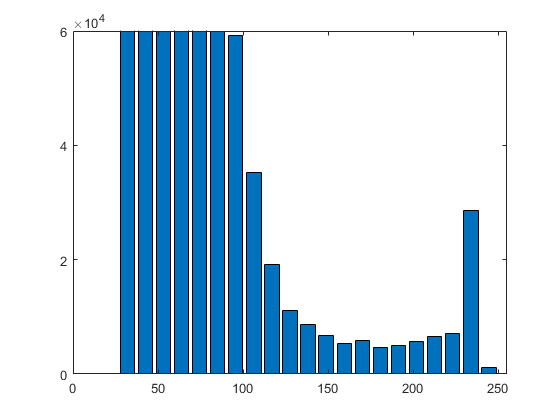

In [11]:
f = imread('Fig0203(a).tif');
h = imhist(f, 25);
horz = linspace(0, 255, 25);
bar(horz, h)
axis([0 255 0 60000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:20000:60000)

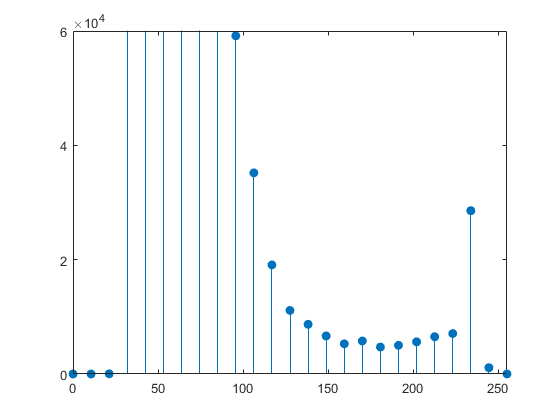

In [12]:
f = imread('Fig0203(a).tif');
h = imhist(f, 25);
horz = linspace(0, 255, 25);
stem(horz, h, 'fill')
axis([0 255 0 60000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:20000:60000)

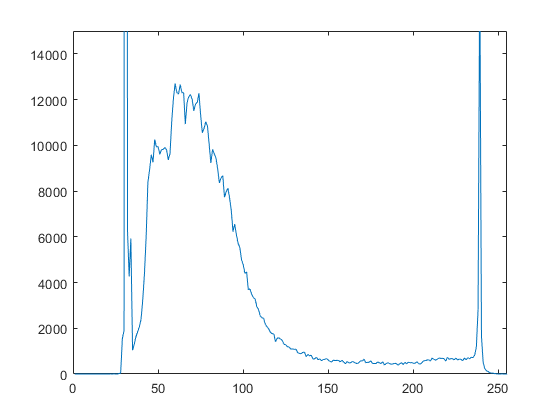

In [13]:
f = imread('Fig0203(a).tif');
hc = imhist(f);
plot(hc)
axis([0 255 0 15000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:2000:15000)

## 2.3.2 Histogram Equalization
### Example 2.5: Histogram equalization

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



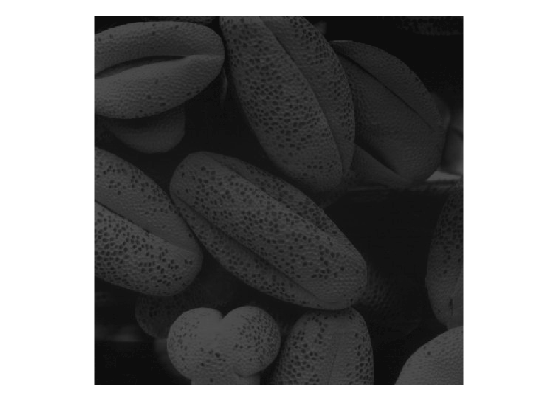

In [3]:
f = imread('Fig0208(a).tif');
imshow(f)

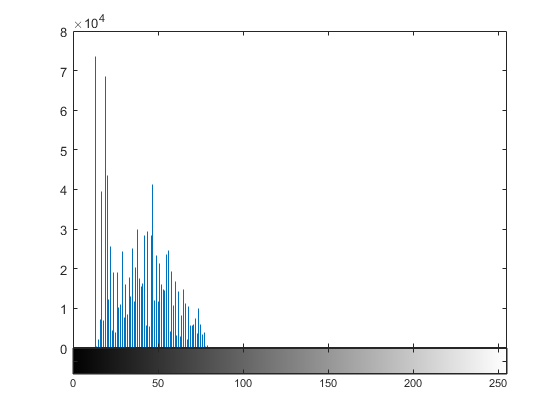

In [4]:
imhist(f)
ylim('auto')

警告: 图像太大，无法在屏幕上显示；将以 67% 显示
> In images.internal.initSize (line 71)
  In imshow (line 336)



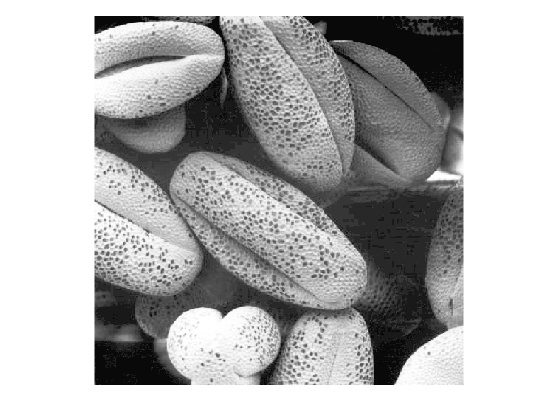

In [7]:
g = histeq(f, 256);
imshow(g)

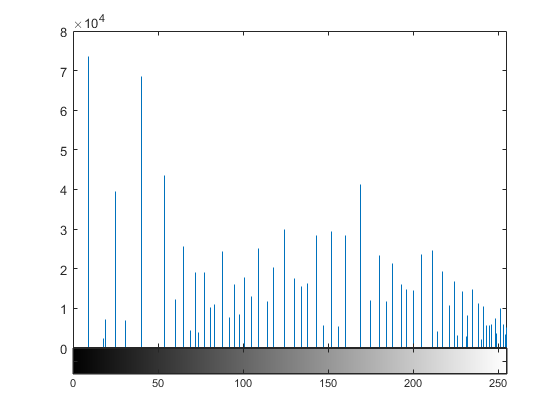

In [8]:
imhist(g)
ylim('auto')

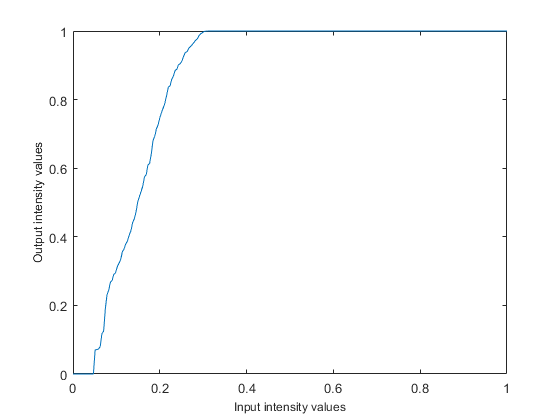

In [24]:
hnorm = imhist(f)./numel(f);
cdf = cumsum(hnorm);

x = linspace(0, 1, 256);
plot(x, cdf)
axis([0 1 0 1]);
set(gca, 'xtick', 0:.2:1)
set(gca, 'ytick', 0:.2:1)
xlabel('Input intensity values', 'fontsize', 9)
ylabel('Output intensity values', 'fontsize', 9)

## 2.3.3 Histogram Matching (Specification)

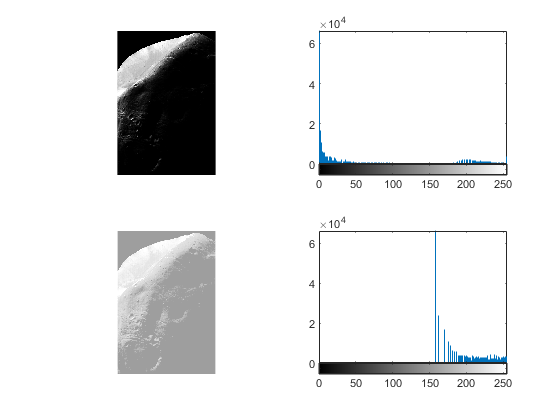

In [7]:
f = imread('Fig0210(a).tif');
f1 = histeq(f, 256);

subplot(221), imshow(f)
subplot(222), imhist(f)
subplot(223), imshow(f1)
subplot(224), imhist(f1)

## 2.3.4 Function adapthisteq

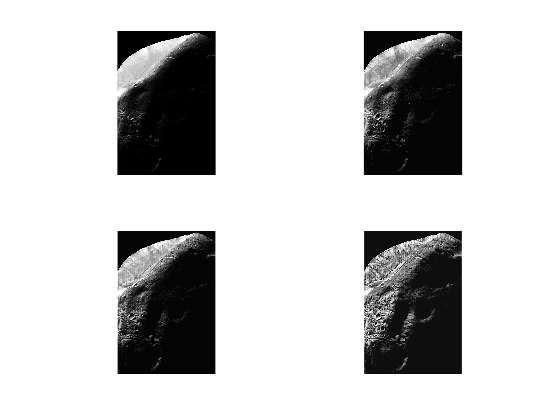

In [6]:
f = imread('Fig0210(a).tif');
g1 = adapthisteq(f);
g2 = adapthisteq(f, 'NumTiles', [25 25]);
g3 = adapthisteq(f, 'NumTiles', [25 25], 'ClipLimit', 0.05);

subplot(221), imshow(f)
subplot(222), imshow(g1)
subplot(223), imshow(g2)
subplot(224), imshow(g3)